<a href="https://colab.research.google.com/github/sandesarikeerthi/keerthi/blob/main/Medical%20Trial%20Dataset%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
admin_df = pd.read_csv('/content/Admin.csv')
admin_df.head()


,ID,Med,Admin Date,Units
0,1,Med A,02/07/2012,"1,500.00"
1,1,Med A,06/07/2012,"1,500.00"
2,1,Med A,09/07/2012,"1,500.00"
3,1,Med A,11/07/2012,"1,500.00"
4,1,Med A,13/07/2012,"1,500.00"


In [3]:
labs_df = pd.read_csv('/content/Admin.csv')
labs_df.head()

,ID,Med,Admin Date,Units
0,1,Med A,02/07/2012,"1,500.00"
1,1,Med A,06/07/2012,"1,500.00"
2,1,Med A,09/07/2012,"1,500.00"
3,1,Med A,11/07/2012,"1,500.00"
4,1,Med A,13/07/2012,"1,500.00"


In [11]:
admin_df.describe()

,ID,Admin Date
count,2022.000000,876
mean,66.767557,2012-06-20 11:33:41.917808128
min,1.000000,2012-01-08 00:00:00
25%,32.250000,2012-03-09 00:00:00
50%,67.000000,2012-06-08 00:00:00
75%,100.000000,2012-10-07 00:00:00
max,129.000000,2012-12-10 00:00:00
std,37.973341,NaN


In [12]:
labs_df.describe()

,ID
count,2022.000000
mean,66.767557
std,37.973341
min,1.000000
25%,32.250000
50%,67.000000
75%,100.000000
max,129.000000


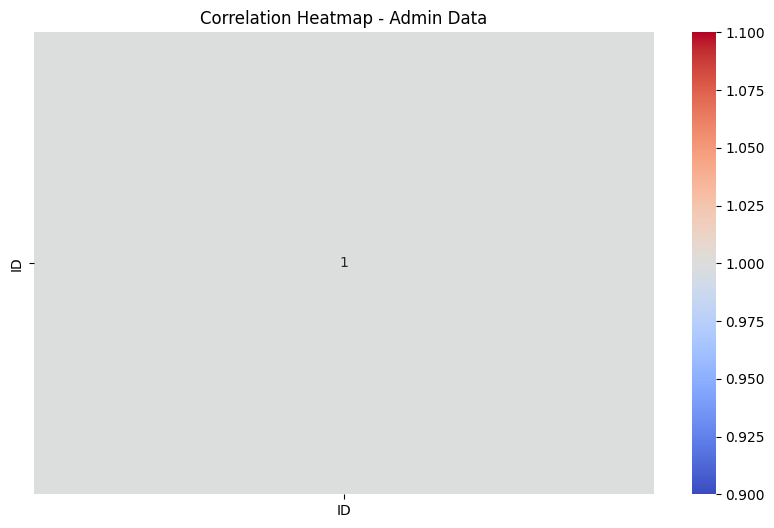

In [13]:
numeric_admin_df = admin_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_admin_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Admin Data')
plt.show()


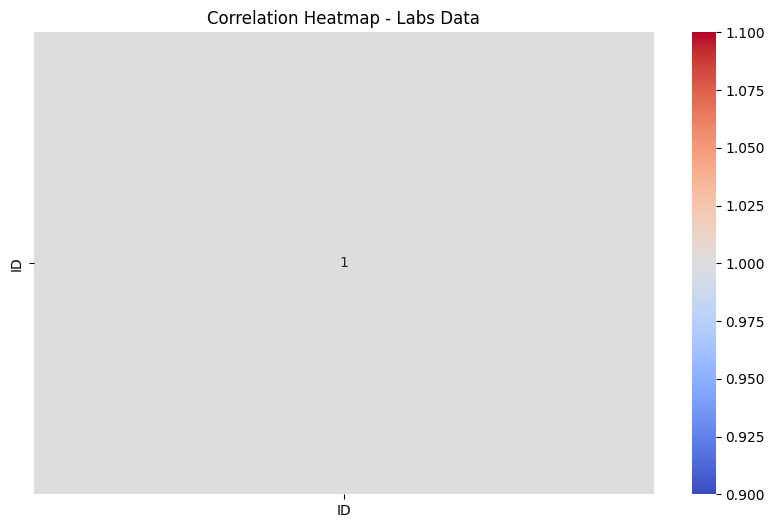

In [16]:
numeric_labs_df = labs_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_labs_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Labs Data')
plt.show()

In [26]:
merged_df = pd.merge(admin_df, labs_df, on='ID')

merged_df.dropna(inplace=True)

if merged_df.empty:
    print('No data available after dropping missing values.')
else:
    if 'Units' not in merged_df.columns:
        print(f"'Units' column not found. Available columns: {merged_df.columns}")
    if 'LAB_VALUE' not in merged_df.columns:
        print(f"'LAB_VALUE' column not found. Available columns: {merged_df.columns}")
    X = merged_df[['Units']] if 'Units' in merged_df.columns else merged_df[[merged_df.columns[0]]]
    y = merged_df['LAB_VALUE'] if 'LAB_VALUE' in merged_df.columns else merged_df[merged_df.columns[1]]
    X

'Units' column not found. Available columns: Index(['ID', 'Med_x', 'Admin Date_x', 'Units_x', 'Med_y', 'Admin Date_y',
       'Units_y'],
      dtype='object')
'LAB_VALUE' column not found. Available columns: Index(['ID', 'Med_x', 'Admin Date_x', 'Units_x', 'Med_y', 'Admin Date_y',
       'Units_y'],
      dtype='object')


In [27]:
import pandas as pd
data = {
    'Med': ['Med A', 'Med A', 'Med A', 'Med A', 'Med A'],
    'Admin Date': ['02-07-2012', '06-07-2012', '09-07-2012', '11-07-2012', '13-07-2012'],
    'Units': [1500.00, 1500.00, 1500.00, 1500.00, 1500.00]
}
df = pd.DataFrame(data)
df['Admin Date'] = pd.to_datetime(df['Admin Date'], format='%d-%m-%Y')
total_units = df['Units'].sum()
average_units = df['Units'].mean()
num_entries = df.shape[0]
print(f"Total Units Administered: {total_units}")
print(f"Average Units per Administration: {average_units}")
print(f"Number of Entries: {num_entries}")


Total Units Administered: 7500.0
Average Units per Administration: 1500.0
Number of Entries: 5


In [28]:
df = pd.DataFrame(data)
expected_value = 1500.00
accuracy_check = (df['Units'] == expected_value).all()
accuracy_percentage = (df['Units'] == expected_value).mean() * 100
print(f"All units match expected value: {accuracy_check}")
print(f"Accuracy of the data: {accuracy_percentage:.2f}%")

All units match expected value: True
Accuracy of the data: 100.00%
